In [1]:
import geopandas as gpd
import pandas as pd
from shapely.ops import nearest_points

In [2]:
# 注意使用GBK编码打开 否则中文字符无法显示
river_shape = gpd.read_file('river/R1/R1/pearl_river.shp', encoding = 'gbk')

In [3]:
river_shape.head()

,FNODE_,TNODE_,LPOLY_,RPOLY_,LENGTH,HYD1_4M_,HYD1_4M_ID,GBCODE,NAME,LEVEL_RIVE,LEVEL_LAKE,geometry
0,18,18,6,4,0.075,1,1359,23010,克鲁伦河,3,1,"LINESTRING (117.75391 49.16444, 117.75777 49.1..."
1,19,19,5,4,0.111,2,1359,23010,克鲁伦河,3,1,"LINESTRING (117.71732 49.18985, 117.72263 49.1..."
2,21,21,7,4,0.104,3,1359,23010,克鲁伦河,3,1,"LINESTRING (117.00603 48.79309, 117.00961 48.7..."
3,29,32,10,13,0.418,4,355,21011,乌加河(乌珠尔郭勒),4,0,"LINESTRING (107.79887 41.20994, 107.80186 41.2..."
4,31,33,11,12,0.084,5,346,21011,黄河,1,0,"LINESTRING (107.54871 41.24770, 107.54420 41.2..."


In [4]:
river_shape.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FNODE_      840 non-null    int64   
 1   TNODE_      840 non-null    int64   
 2   LPOLY_      840 non-null    int64   
 3   RPOLY_      840 non-null    int64   
 4   LENGTH      840 non-null    float64 
 5   HYD1_4M_    840 non-null    int64   
 6   HYD1_4M_ID  840 non-null    int64   
 7   GBCODE      840 non-null    int64   
 8   NAME        796 non-null    object  
 9   LEVEL_RIVE  840 non-null    int64   
 10  LEVEL_LAKE  840 non-null    int64   
 11  geometry    840 non-null    geometry
dtypes: float64(1), geometry(1), int64(9), object(1)
memory usage: 78.9+ KB


In [5]:
river_shape['NAME'].unique()

array(['克鲁伦河', '乌加河(乌珠尔郭勒)', '黄河', None, '布哈河(盐坎河)',
       '京杭运河(梁济运河、湖西航道、不牢河)', '淮河', '京杭运河(里运河)', '长江', '雅鲁藏布江', '赣江',
       '浔江', '西江', '黑龙江', '额尔古纳河', '海拉尔河', '松阿察河', '奎屯河', '开都河', '北运河',
       '南运河(卫运河、小运河)', '约古宗列渠', '京杭运河(韩庄运河)', '通天河', '沱沱河(玛曲)',
       '京杭运河(中运河)', '扎曲', '狮泉河(森格藏布、印度河)', '扎加藏布(香嘎曲)', '金沙江', '澜沧江',
       '当却藏布(马泉河)', '京杭运河(江南运河)', '湘江', '南盘江', '红水河', '黔江',
       '珠江(前航道、后航道、虎门水道)', '北江干流水道(顺德水道、沙湾水道)', '北江(浈水)',
       '西江干流水道(西海水道、磨刀门水道)', '洪奇沥水道', '蕉门水道', '横门水道(小榄水道、东海水道)'],
      dtype=object)

In [6]:
# 筛选出珠江的边界信息
pearl_river = river_shape[river_shape['NAME'] == '珠江(前航道、后航道、虎门水道)']

In [7]:
pearl_river.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 23 entries, 761 to 813
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FNODE_      23 non-null     int64   
 1   TNODE_      23 non-null     int64   
 2   LPOLY_      23 non-null     int64   
 3   RPOLY_      23 non-null     int64   
 4   LENGTH      23 non-null     float64 
 5   HYD1_4M_    23 non-null     int64   
 6   HYD1_4M_ID  23 non-null     int64   
 7   GBCODE      23 non-null     int64   
 8   NAME        23 non-null     object  
 9   LEVEL_RIVE  23 non-null     int64   
 10  LEVEL_LAKE  23 non-null     int64   
 11  geometry    23 non-null     geometry
dtypes: float64(1), geometry(1), int64(9), object(1)
memory usage: 2.3+ KB


In [8]:
pearl_river.head()

,FNODE_,TNODE_,LPOLY_,RPOLY_,LENGTH,HYD1_4M_,HYD1_4M_ID,GBCODE,NAME,LEVEL_RIVE,LEVEL_LAKE,geometry
761,676,677,1,521,0.353,762,1125,21011,珠江(前航道、后航道、虎门水道),1,0,"LINESTRING (112.88452 23.15541, 112.88712 23.1..."
768,739,739,524,520,0.071,769,1125,21011,珠江(前航道、后航道、虎门水道),1,0,"LINESTRING (113.21986 23.11990, 113.21873 23.1..."
769,740,740,526,520,0.071,770,1125,21011,珠江(前航道、后航道、虎门水道),1,0,"LINESTRING (113.29226 23.11082, 113.29701 23.1..."
770,742,742,528,520,0.055,771,1125,21011,珠江(前航道、后航道、虎门水道),1,0,"LINESTRING (113.41726 23.09560, 113.41535 23.0..."
771,745,745,530,520,0.045,772,1125,21011,珠江(前航道、后航道、虎门水道),1,0,"LINESTRING (113.48840 23.07078, 113.48702 23.0..."


<Axes: >

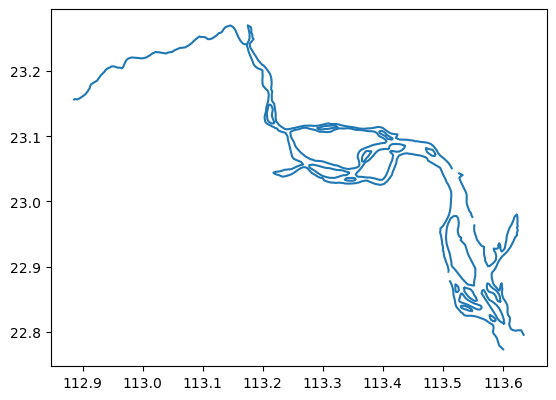

In [9]:
# 可视化
pearl_river['geometry'].plot()

In [10]:
# pearl_river有多段 需要合并为一合并几何体
pearl_river_union = pearl_river.unary_union

In [11]:
# 读取小区CSV文件
communities = pd.read_csv('communities_with_distance.csv')

In [12]:
# 创建GeoDataFrame
community_gdf = gpd.GeoDataFrame(communities, geometry=gpd.points_from_xy(communities.longitude, communities.latitude))

In [13]:
# 使用set_crs方法并通过epsg参数设置GCJ-02坐标参考系
community_gdf.set_crs(epsg = 4490, inplace=True)

,小区名字,小区地址,均价,容积率,有无停车位,物业费_元/平方米/月,绿化率_percent,latitude,longitude,BUS,HOS,MAR,SUB,PSC,MSC,PAR,CBD,SCBD,geometry
0,盈彩美居,天河-东圃-盈溪路,54560,2.88,1,1.20,30.0,23.124325,113.415697,256.509826,1535.484711,175.643977,1196.714612,417.639070,856.055562,161.120353,9319.496930,7467.040911,POINT (113.41570 23.12433)
1,兰亭盛荟,天河-东圃-东圃明镜路,70093,3.80,1,3.50,62.0,23.124325,113.415697,256.509826,1535.484711,175.643977,1196.714612,417.639070,856.055562,161.120353,9319.496930,7467.040911,POINT (113.41570 23.12433)
2,中海康城花园,天河-黄村-广园快速路,45544,1.74,1,2.37,40.0,23.132456,113.419568,152.513554,2100.395942,451.259944,1207.328398,388.567987,383.483784,703.540475,9796.623781,8166.680740,POINT (113.41957 23.13246)
3,宝翠园,天河-龙洞-宝翠路4号,58641,2.66,1,1.90,45.2,23.196825,113.369955,23.832257,5297.997351,346.016106,713.996616,423.282983,382.525096,362.763426,9674.438398,9123.633151,POINT (113.36996 23.19682)
4,东方新世界,天河-天河公园-中山大道西158号,84828,3.99,1,2.30,42.0,23.139163,113.366326,219.307358,265.723923,300.167413,1482.307992,433.038452,1132.855629,1241.665762,4742.191821,4540.610699,POINT (113.36633 23.13916)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,谊园,荔湾-黄沙-黄沙后道17号,30000,1.30,0,0.50,21.0,23.116697,113.244851,150.466942,797.397138,114.856281,208.539997,214.598455,244.168609,743.199636,8172.438485,1544.883691,POINT (113.24485 23.11670)
2278,文昌北路幸福二巷9号小区,荔湾-龙津-文昌北路幸福二巷9号,24600,1.20,0,0.50,20.0,23.128803,113.249009,149.311374,674.475356,129.548988,264.325127,196.411919,36.813750,538.100896,7792.099049,2194.864643,POINT (113.24901 23.12880)
2279,新基路23号小区,荔湾-黄沙-新基路23号,19000,1.50,0,0.90,30.0,23.113663,113.256889,67.637696,400.874367,421.637304,64.145321,190.021564,255.215040,620.626459,6971.692484,331.799334,POINT (113.25689 23.11366)
2280,广东省林业厅机关大院,"荔湾-荔湾路-中山七路,近荔湾路",32400,1.50,0,0.90,30.0,23.131960,113.255550,74.292266,58.105729,248.886638,698.475098,387.641819,461.722336,478.917167,7182.613661,2330.761998,POINT (113.25555 23.13196)


In [14]:
# 定义函数计算每个小区到珠江边界的最短距离并将计算结果单位从度转换为米（1度约为111.32公里）
def calculate_min_distance_to_boundary(point):
    nearest_point = nearest_points(point, pearl_river_union)
    return point.distance(nearest_point[1])*111320

In [15]:
community_gdf['min_distance_to_pearl_river'] = community_gdf['geometry'].apply(lambda x: calculate_min_distance_to_boundary(x))

In [16]:
community_gdf['min_distance_to_pearl_river'].describe()

count     2282.000000
mean      2103.932016
std       1286.795292
min          1.212449
25%       1345.186813
50%       2104.807143
75%       2507.593101
max      11516.574452
Name: min_distance_to_pearl_river, dtype: float64

In [17]:
# 将新变量写入数据集
communities['RIV'] = community_gdf['min_distance_to_pearl_river']
communities.to_csv('communities_with_distance_river.csv', index = False)